# Investigate TMDb movie data
## by Abd Al Jalil Nasser
The primary goal of the project is to go through the dataset and the general data analysis process using numpy, pandas and matplotlib. This contain four parts:

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset

TMDb movie data (cleaned from original data on [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata)).The data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
- Total Rows = 10866
- Total Columns = 21
- Certain columns, like ‘cast’
  and ‘genres’, contain multiple
  values separated by pipe (|)
  characters.
- The final two columns ending
  with “_adj” show the budget and
  revenue of the associated movie
  in terms of 2010 dollars,
  accounting for inflation over
  time.

## questions to ask : 
1. who are the top 3 directors have the most successful movies and and what is the number of their movies? 
2. what is the percentage of their success ?  
3. what is the movie with the highest and lowest budget based on a reference year dollars (2010) ? 
4. How is the total revenue of movies over years based on a reference year dollars (2010) ? 
5. How is the total budget of movies over years based on a reference year dollars (2010) ? 
6. How is the total profit of movies over years based on a reference year dollars (2010) ? 
7. How many movies are released in each year over years? 
8. How is the runtime of movies over years  ?
9. what is the longest and shortest movie ? 
10. what is the number of movies that have homepage ? 
11. what is the percentage of movies that have homepage  ? 
12. what is the effect of having homepage on popularity of movie ? 
13. what are the top 10  movies that have budget based on a reference year dollars (2010) ? 
14. what are the most 10 profitable movies based on a reference year dollars (2010)?
15. What are the top 10  popular movies ? 
16. What are the top 10  rated movies ?  
17. who are the top 10 directors based on the number of released movies ? 
18. what is the effect of popularity on profit ?
19. what is the effect of runtime on average voting (rating) ? 
20. what is the effect of budget on profit ? 
21. what is the top 10 production companies based on number of released movies ? 


<a id='wrangling'></a>
## Data Wrangling


In [115]:
# import all packages and set plots to be embedded inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

### Gathering Data

In [55]:
df = pd.read_csv('tmdb-movies.csv')

### General Properties

In [56]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [58]:
df.shape

(10866, 21)

In [59]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [60]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [61]:
df.director.value_counts()

Woody Allen                   45
Clint Eastwood                34
Martin Scorsese               29
Steven Spielberg              29
Ridley Scott                  23
                              ..
James Hawes                    1
Fred Schepisi|Robert Young     1
Wei Tung                       1
Gary Katona|Ed Wexler          1
Arthur Lubin                   1
Name: director, Length: 5067, dtype: int64

### Data Cleaning 
        1.fill na values 
        2.remove duplicates
        3.handling the outlier of numeric columns by replaceing zeros with the median of this column in the 
        release year 

#### Fill na values

imdb_id , cast , homepage , director , tagline , keywords , overview , genres ,production_companies  
have nan values. (all these columns are strings)

In [62]:
 df.fillna('', inplace =True)

In [63]:
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#### remove duplicates

In [64]:
# Every movies should has its unique id . If two movies have the same id so it is a problem 
# number of movies the have the same id 
df["id"].duplicated().sum()

1

In [65]:
df.drop_duplicates(subset ="id", keep = 'first', inplace = True) 

In [66]:
df["id"].duplicated().sum()

0

#### handling the outlier of numeric columns by replaceing zeros with the median of this column in the release year 

In [67]:
modify_numeric = ['budget','revenue','runtime','budget_adj' , 'revenue_adj']
for y in modify_numeric:
    number = df[df[y]==0]['id'].count()
    print (y+" has {} zeros ".format(number))
    filter_condtion = df[y] !=0
    mapped_s = df[filter_condtion].groupby("release_year")[y].median()
    df.loc[~filter_condtion, y] = df['release_year'].map(mapped_s)

budget has 5696 zeros 
revenue has 6016 zeros 
runtime has 31 zeros 
budget_adj has 5696 zeros 
revenue_adj has 6016 zeros 


In [68]:
print ('number of zeros after modification in budget column:', df[df['budget']==0]['id'].count())

number of zeros after modification in budget column: 0


<a id='eda'></a>
## Exploratory Data Analysis
we have trimmed and cleaned the data, we're ready to move on to exploration. Compute statistics and create visualizations and answer the questions that we have asked



### who are the top 3 directors have the most successful movies and and what is the number of their movies?

Text(0.5, 1.0, 'Top directors and number of their successful movies')

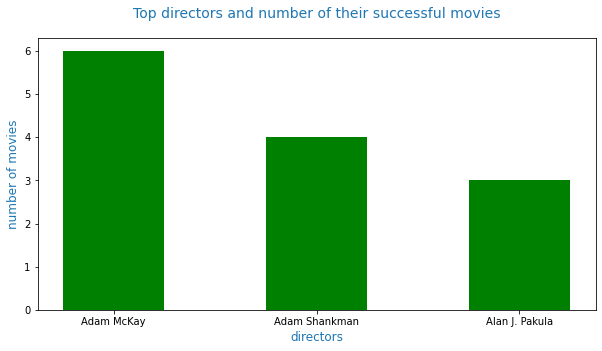

In [183]:
popularity_mean = df['popularity'].mean()
profit_mean = (df['revenue_adj']-df['budget_adj']).mean()
popular_dirctores_series= df[(df['popularity']>= popularity_mean) & (df['revenue_adj']-df['budget_adj']>= profit_mean)].groupby('director')['id'].count().head()
popular_dirctores_series.sort_values(ascending=False, inplace=True)
popular_dirctores_series = popular_dirctores_series.head(3)
popular_dirctores = list(popular_dirctores_series.index)
plt.rcParams['figure.figsize'] = [10, 5]
plot = plt.figure(1)
plt.bar(popular_dirctores,popular_dirctores_series,width = 0.5,color = 'g')
plt.xlabel('directors',fontsize = 12,c='#1f77b4')
plt.ylabel('number of movies',fontsize = 12, c='#1f77b4')
plt.title('Top directors and number of their successful movies',fontsize = 14,c='#1f77b4',pad= 20)

### what is the percentage of their success ?

Text(0.5, 1.0, 'Top directors and precentage of successful movies')

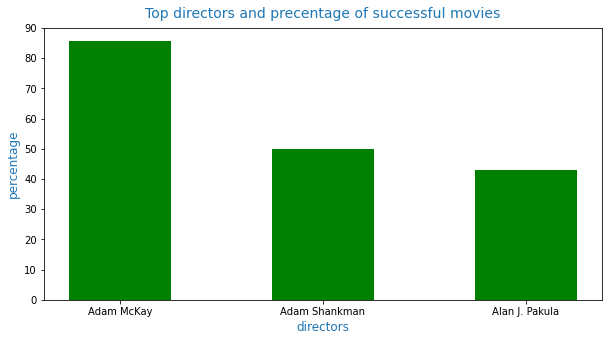

In [187]:
popular_dirctores_all_movies = df[df['director'].isin (popular_dirctores) ].groupby('director')['id'].count()
plot2 = plt.figure(2)
plt.bar(popular_dirctores, (popular_dirctores_series /popular_dirctores_all_movies)*100,width = 0.5,color = 'g')
plt.xlabel('directors',fontsize = 12,c='#1f77b4')
plt.ylabel('percentage',fontsize = 12, c='#1f77b4')
plt.title('Top directors and precentage of successful movies',fontsize = 14, c='#1f77b4',pad= 10)


In [72]:
print ('the top 3 directors  ',popular_dirctores_all_movies.to_frame('total number of movies'))

the top 3 directors                   total number of movies
director                              
Adam McKay                           7
Adam Shankman                        8
Alan J. Pakula                       7


- Adam Shankman made 6 successful movies with success 85 %
- Adam Mckay made 6 successful movies with success 50 %
- Alan J. Pakula made 3 successful movies with success 42.85 %

### what is the movie with the highest and lowest budget based on a reference year dollars (2010)

In [73]:
print ("movie with the highest and lowest budget based 2010 dollars" )
print(df.loc[(df[df['budget_adj'] > 0]["budget_adj"]).idxmin()],df.loc[(df["budget_adj"]).idxmax()])


movie with the highest and lowest budget based 2010 dollars
id                                                                 287524
imdb_id                                                         tt2165765
popularity                                                       0.177102
budget                                                                  1
revenue                                                       2.62752e+07
original_title                                                Fear Clinic
cast                    Thomas Dekker|Robert Englund|Cleopatra Coleman...
homepage                                  http://www.fearclinicmovie.com/
director                                                      Robert Hall
tagline                                                                  
keywords                                               phobia|doctor|fear
overview                A doctor works to cure patients suffering from...
runtime                                             

**The Warrior's Way**  : The movie that has the highest budget based on a reference dollar (2010) with 
budget 425 million dollars 

**Fear Clinic** : The moive that has the lowest budget based on a reference dollar (2010) with budget 
0.921091 dollars

### How is the total revenue of movies over years based on a reference year dollars (2010)

Text(0.5, 1.0, ' budget of  movies in terms of 2010 dollars  over years')

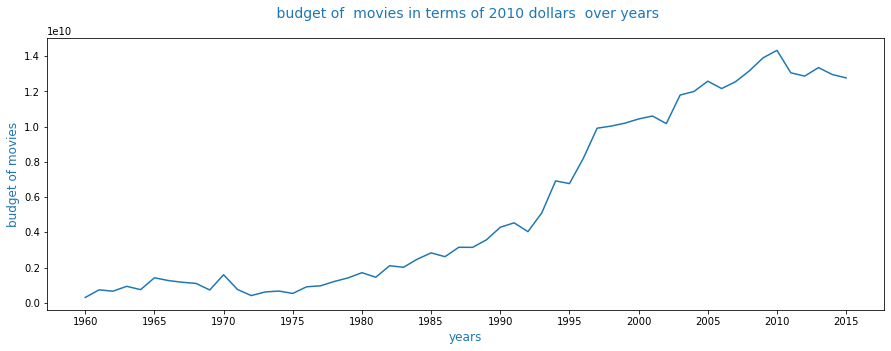

In [189]:
plt.rcParams['figure.figsize'] = [15, 5]
plot3 = plt.figure(3)
budget_over_years_df = df.groupby("release_year")['budget_adj'].sum()
plt.plot(budget_over_years_df.index, budget_over_years_df.values)
plt.xlabel('years',fontsize = 12, c='#1f77b4')
plt.ylabel('budget of movies',fontsize = 12 , c='#1f77b4')
plt.xticks(np.arange(1960,2016,5))
plt.title(' budget of  movies in terms of 2010 dollars  over years',fontsize = 14 , c='#1f77b4',pad= 20)


The budget of movies increaases over years.  
2010 is the year that has the highest budget with 14.335 billion dollars 

### How is the total budget of movies over years based on a reference year dollars (2010)

Text(0.5, 1.0, 'revenue in terms of 2010 dollars over years')

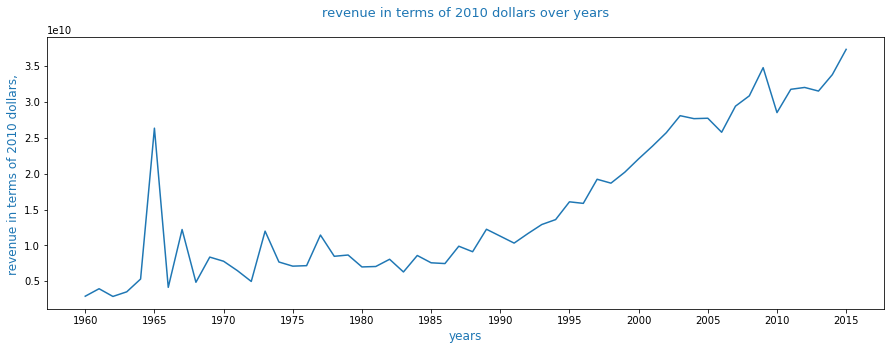

In [190]:
revenue_series = df.groupby('release_year')['revenue_adj'].sum()
plot4 = plt.figure(4)
plt.plot(list(revenue_series.index),revenue_series)
plt.xlabel('years',fontsize = 12, c='#1f77b4')
plt.ylabel('revenue in terms of 2010 dollars, ',fontsize = 12 , c='#1f77b4')
plt.xticks(np.arange(1960,2016,5))
plt.title('revenue in terms of 2010 dollars over years',fontsize = 13 , c='#1f77b4',pad= 20)

The revenue of movies increaases over years 

2015 is the year that has the highest revenue with 37.36 billion dollars 

### How is the profit of movies over years based on a reference year dollars (2010)

Text(0.5, 1.0, 'profit in terms of 2010 dollars over years')

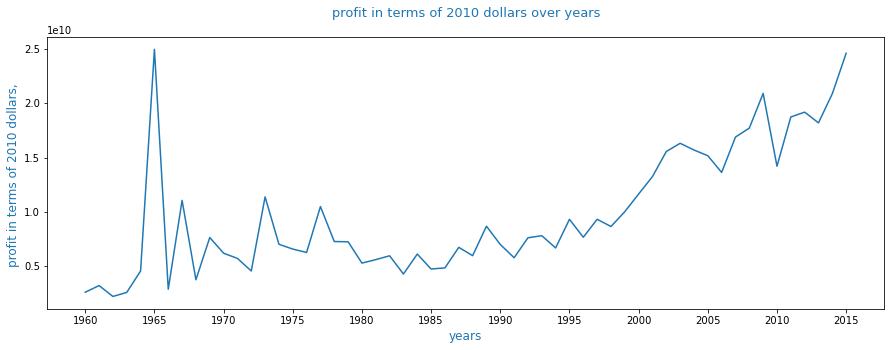

In [191]:
profit_series = revenue_series - budget_over_years_df
plot5 = plt.figure(5)
plt.plot(list(profit_series.index),profit_series)
plt.xlabel('years',fontsize = 12, c='#1f77b4')
plt.ylabel('profit in terms of 2010 dollars, ',fontsize = 12 , c='#1f77b4')
plt.xticks(np.arange(1960,2016,5))
plt.title('profit in terms of 2010 dollars over years',fontsize = 13 , c='#1f77b4',pad= 20)


The profit of movies increaases over years.  
1960 is the year that has the highest profit with 24.95 billion dollars 

### what is the number of movies over years

Text(0.5, 1.0, ' number of movies over years')

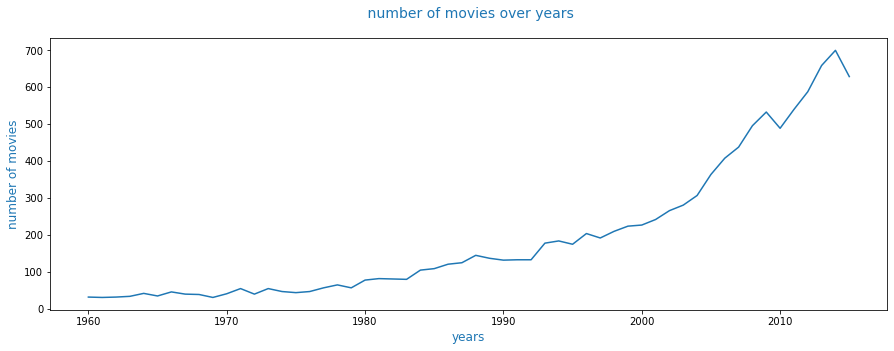

In [192]:
plot6 = plt.figure(6)
movies_over_years_df = df.groupby("release_year")['id'].count()
plt.plot(movies_over_years_df.index, movies_over_years_df.values)
plt.xlabel('years',fontsize = 12, c='#1f77b4')
plt.ylabel('number of movies',fontsize = 12 , c='#1f77b4')
plt.title(' number of movies over years',fontsize = 14 , c='#1f77b4',pad= 20)

number of movies increases over years.  
2014 is the year of the highest number of movies with 700 movie.

### How is the runtime of movies over years 

Text(0.5, 1.0, 'Runtime of movies over years')

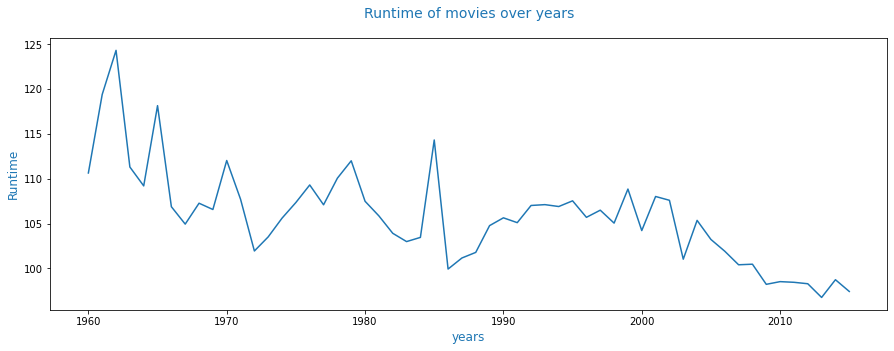

In [194]:
plot7 = plt.figure(7)
runtime_series= df.groupby('release_year')['runtime'].mean()
plt.plot(list(runtime_series.index),runtime_series)
plt.xlabel('years',fontsize = 12, c='#1f77b4')
plt.ylabel('Runtime',fontsize = 12 , c='#1f77b4')
plt.title("Runtime of movies over years",fontsize = 14 , c='#1f77b4',pad= 20)

Runtime of movies decreases over years.  
2013 is the year that has the lowest average of runtime of the movie  with average runtime 96 minutes

### what is the longest and shortest movie

In [195]:
print ('longest and shortest movie')
print(df.loc[(df[df['runtime'] > 0]["runtime"]).idxmin()],df.loc[(df["runtime"]).idxmax()])

longest and shortest movie
id                                                                 142563
imdb_id                                                         tt2309977
popularity                                                       0.078472
budget                                                           15000000
revenue                                                       2.43987e+07
original_title                                            Fresh Guacamole
cast                                                                     
homepage                                                                 
director                                                              PES
tagline                                                                  
keywords                                                                 
overview                In this follow-up to his stop-motion hit Weste...
runtime                                                                 2
genres     

**Fresh Guacamole** :  is the shortest movie with 2 minutes  
**The Story of Film**: An Odyssey : is the longest movie with 900 minutes

### what is the number of movies that have homepage

Text(0.5, 1.0, 'movies that have homepage')

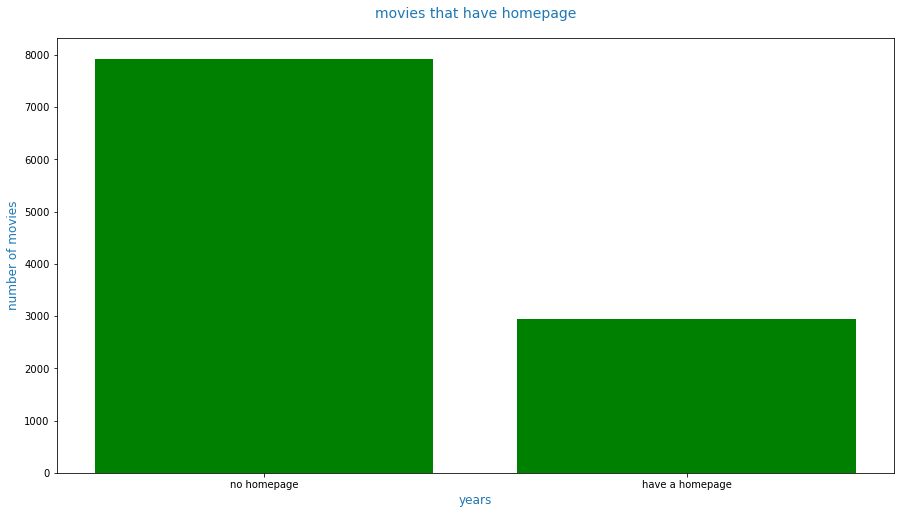

In [204]:
plt.rcParams['figure.figsize'] = [15,8]
plot8 = plt.figure(8)
plt.bar(x=["no homepage" , "have a homepage"], height=[(df['homepage']=="").sum(),(df['homepage']!="").sum()],color = 'g')
plt.xlabel('years',fontsize = 12, c='#1f77b4')
plt.ylabel('number of movies',fontsize = 12 , c='#1f77b4')
plt.title("movies that have homepage",fontsize = 14 , c='#1f77b4',pad= 20)

most of the movies doesn't have homepage  
7929 movies don't have homepage  
2939 movies have homepage  

### what is the percentage of movies that have homepage 

Text(0.5, 1.0, 'percentage of movies have homepage ')

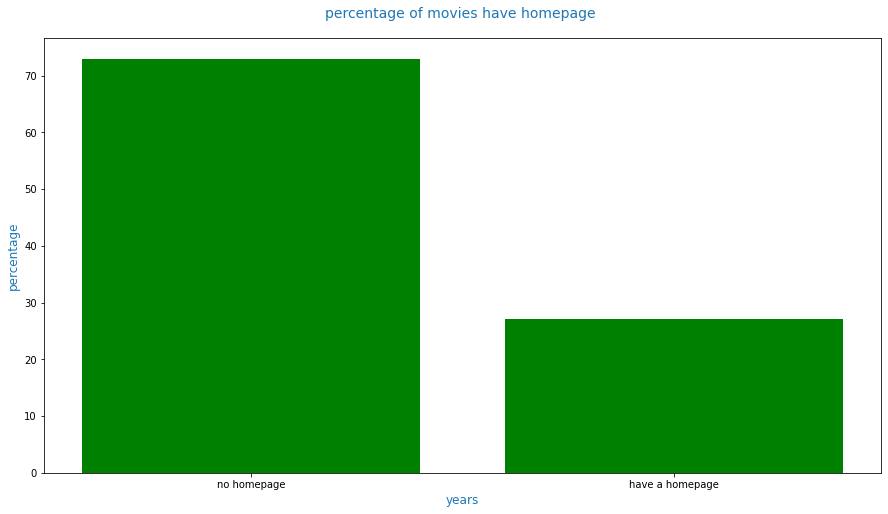

In [205]:
plot9 = plt.figure(9)
plt.bar(x=["no homepage" , "have a homepage"], height=[(((df['homepage']=="").sum())/df.shape[0])*100,(((df['homepage']!="").sum())/df.shape[0])*100],color = 'g')
plt.xlabel('years',fontsize = 12, c='#1f77b4')
plt.ylabel('percentage',fontsize = 12 , c='#1f77b4')
plt.title("percentage of movies have homepage ",fontsize = 14 , c='#1f77b4',pad= 20)

73% of movies don't have homepages  
27% of movies have homepages 

### what is the effect of having homepage on popularity of movie

In [206]:
print('percentage of movies that have homepage and popular from all movies that have homepage')
print((df[(df['homepage'] !="" ) & (df["popularity"] >= popularity_mean)].shape[0])/(df['homepage']!="").sum())
print('percentage of movies that do not have homepage and popular from all movies that do not have homepage')
print((df[(df['homepage'] =="" ) & (df["popularity"] >= popularity_mean)].shape[0])/(df['homepage']=="").sum())


percentage of movies that have homepage and popular from all movies that have homepage
0.4141689373297003
percentage of movies that do not have homepage and popular from all movies that do not have homepage
0.23256400554924958


2939 movies have homepage with 27% of total number of movies  
41.5 % of  movies that have homepage are popular .  
7929 movies don't have homepage with 73% of total number of movies  
23.3 % of  movies that don't have homepage are popular  
Having a homepage increase the propapbilty of being a popular movie 

### what are the top 10  movies that have budget based on a reference year dollars (2010)

Text(0.5, 1.0, 'the top 10 movies that have budget in 2010 dollars')

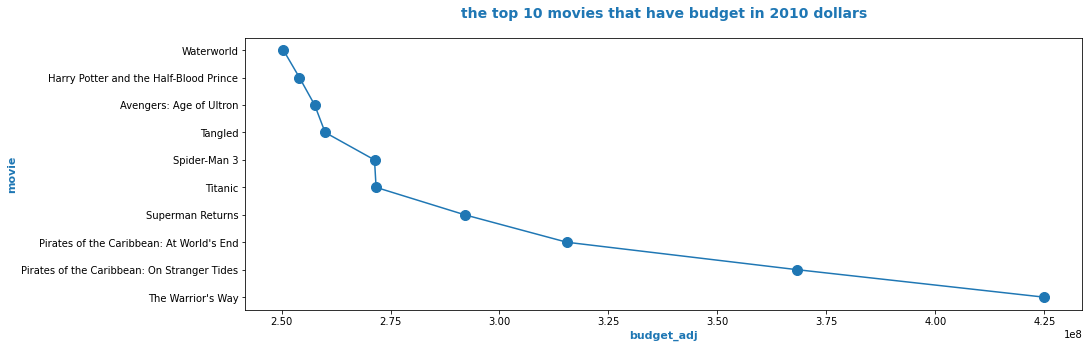

In [219]:
plt.rcParams['figure.figsize'] = [15, 5]
plot10 = plt.figure(10)
top_budget_movies =df[df['budget_adj']>0].loc[:,["budget_adj","original_title"]].sort_values(by=["budget_adj"],ascending= False).head(10)
plt.plot(top_budget_movies['budget_adj'],top_budget_movies['original_title'],marker='o',markersize= 10)
plt.xlabel("budget_adj",fontsize=11,fontweight ='bold',c='#1f77b4')
plt.ylabel('movie',fontsize=11,fontweight ='bold',c='#1f77b4')
plt.title("the top 10 movies that have budget in 2010 dollars",fontsize = 14 , c='#1f77b4',pad= 20,fontweight ='bold')

In [220]:
print ("The top 10 movies that have budget based on a reference year dollars (2010)\n")
print (top_budget_movies.loc[:,['original_title','budget_adj']])

The top 10 movies that have budget based on a reference year dollars (2010)

                                   original_title    budget_adj
2244                            The Warrior's Way  4.250000e+08
3375  Pirates of the Caribbean: On Stranger Tides  3.683713e+08
7387     Pirates of the Caribbean: At World's End  3.155006e+08
6570                             Superman Returns  2.920507e+08
5231                                      Titanic  2.716921e+08
7394                                 Spider-Man 3  2.713305e+08
1929                                      Tangled  2.600000e+08
14                        Avengers: Age of Ultron  2.575999e+08
1389       Harry Potter and the Half-Blood Prince  2.541001e+08
8089                                   Waterworld  2.504192e+08


###  what are the most 10 profitable movies

Text(0.5, 1.0, ' the top 10 profitable movies in 2010 dollars  ')

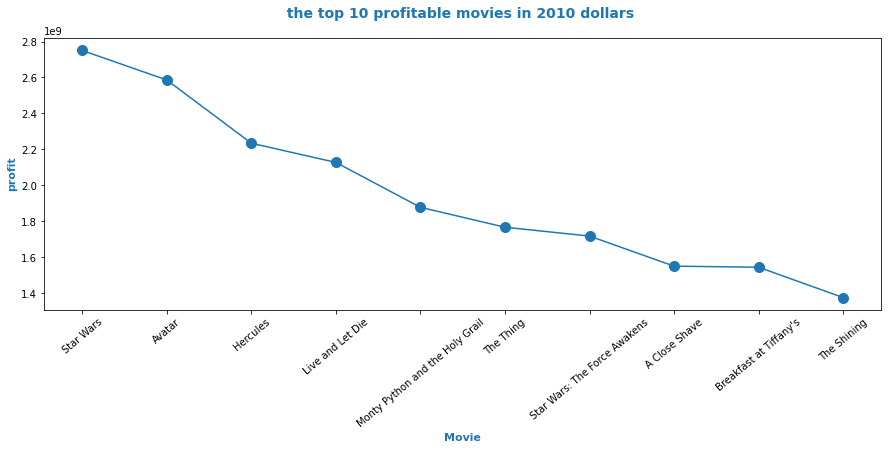

In [222]:
profitable_movies = pd.DataFrame((df['revenue_adj']-df['budget_adj']).sort_values(ascending = False).head(10),columns=["profit_adj"])
temp = (df.iloc[(profitable_movies.index)]).loc[:,["original_title"]]
temp.set_index(profitable_movies.index,inplace = True)
profitable_movies ["original_title"] = temp
plot11 = plt.figure(11)
plt.plot(profitable_movies ['original_title'].values ,profitable_movies["profit_adj"].values , marker='o',markersize= 10)
plt.xlabel("Movie",fontsize=11,fontweight ='bold',c='#1f77b4')
plt.xticks(rotation = 40)
plt.ylabel('profit',fontsize=11,fontweight ='bold',c='#1f77b4')
plt.title(" the top 10 profitable movies in 2010 dollars  ",fontsize = 14 , c='#1f77b4',pad= 20,fontweight ='bold')

In [223]:
print ("the top 10 profitable movies in 2010 dollars\n\n",profitable_movies)

the top 10 profitable movies in 2010 dollars

          profit_adj                   original_title
1329   2.750137e+09                        Star Wars
1386   2.586237e+09                           Avatar
5231   2.234714e+09                         Hercules
10594  2.128036e+09                 Live and Let Die
9806   1.878643e+09  Monty Python and the Holy Grail
8889   1.767968e+09                        The Thing
3      1.718723e+09     Star Wars: The Force Awakens
8094   1.551568e+09                    A Close Shave
10110  1.545635e+09           Breakfast at Tiffany's
7309   1.376998e+09                      The Shining


### what are the top 10 popular movies

Text(0.5, 1.0, 'the most popular 10 movies')

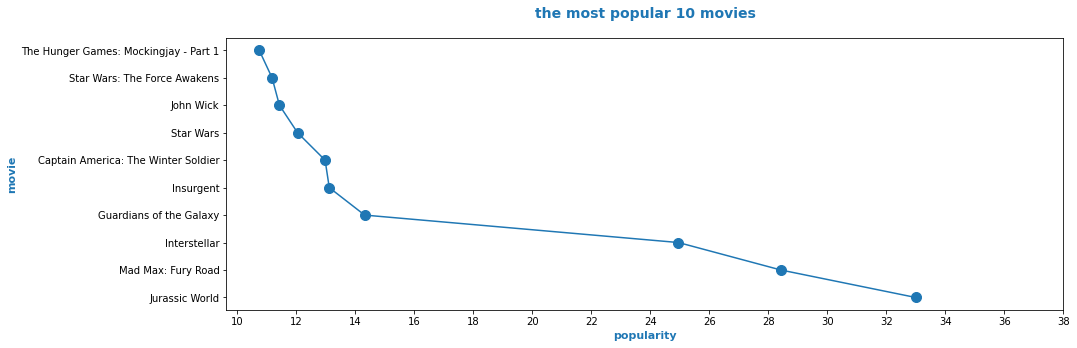

In [226]:
plot12 = plt.figure(12)
popular_movies_df=df[['popularity','original_title']].sort_values(by=['popularity'],ascending= False).head(10)
plt.plot(popular_movies_df['popularity'],popular_movies_df['original_title'],marker='o',markersize= 10)
plt.xlabel("popularity",fontsize=11,fontweight ='bold',c='#1f77b4')
plt.xticks(ticks=np.arange(10,40,2))
plt.ylabel('movie',fontsize=11,fontweight ='bold',c='#1f77b4')
plt.title("the most popular 10 movies",fontsize = 14 , c='#1f77b4',pad=20,fontweight ='bold')


In [230]:
print ('The top 10 popular movies\n\n',popular_movies_df)

The top 10 popular movies

       popularity                         original_title
0      32.985763                         Jurassic World
1      28.419936                     Mad Max: Fury Road
629    24.949134                           Interstellar
630    14.311205                Guardians of the Galaxy
2      13.112507                              Insurgent
631    12.971027    Captain America: The Winter Soldier
1329   12.037933                              Star Wars
632    11.422751                              John Wick
3      11.173104           Star Wars: The Force Awakens
633    10.739009  The Hunger Games: Mockingjay - Part 1


### what are the top 10 rated movies 

Text(0.5, 1.0, ' the top 10 rated movies')

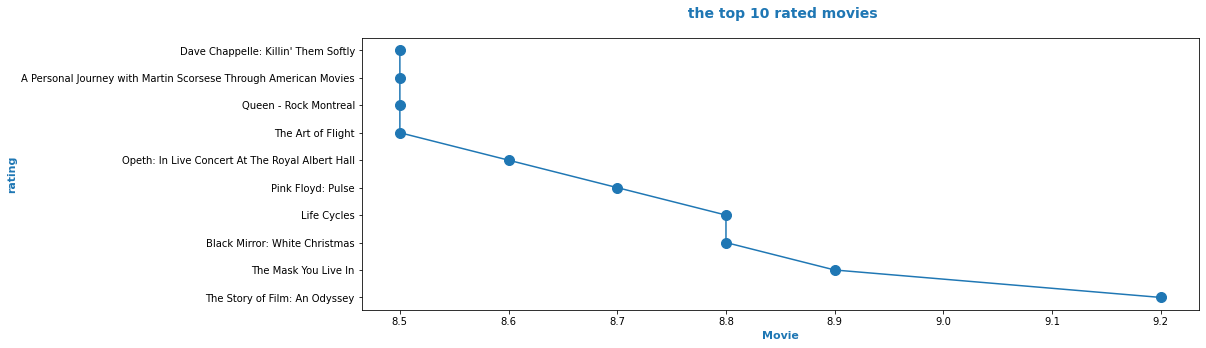

In [232]:
plot13 = plt.figure(13)
rated_movies_df=df[['vote_average','original_title']].sort_values(by=['vote_average'],ascending= False).head(10)
plt.plot(rated_movies_df['vote_average'],rated_movies_df['original_title'],marker='o',markersize= 10)
plt.xlabel("Movie",fontsize=11,fontweight ='bold',c='#1f77b4')
plt.ylabel('rating',fontsize=11,fontweight ='bold',c='#1f77b4')
plt.title(" the top 10 rated movies",fontsize = 14 , c='#1f77b4',pad=20,fontweight ='bold')

In [233]:
print ('the top 10 rated movies\n\n',rated_movies_df)

the top 10 rated movies

       vote_average                                     original_title
3894           9.2                      The Story of Film: An Odyssey
538            8.9                               The Mask You Live In
1200           8.8                      Black Mirror: White Christmas
2269           8.8                                        Life Cycles
6911           8.7                                  Pink Floyd: Pulse
2401           8.6    Opeth: In Live Concert At The Royal Albert Hall
3690           8.5                                  The Art of Flight
8411           8.5                              Queen - Rock Montreal
8221           8.5  A Personal Journey with Martin Scorsese Throug...
8839           8.5                Dave Chappelle: Killin' Them Softly


### who are the top 10 directors based on the number of released movies 

Text(0.5, 1.0, 'the top 10 directors based on the number of released movies')

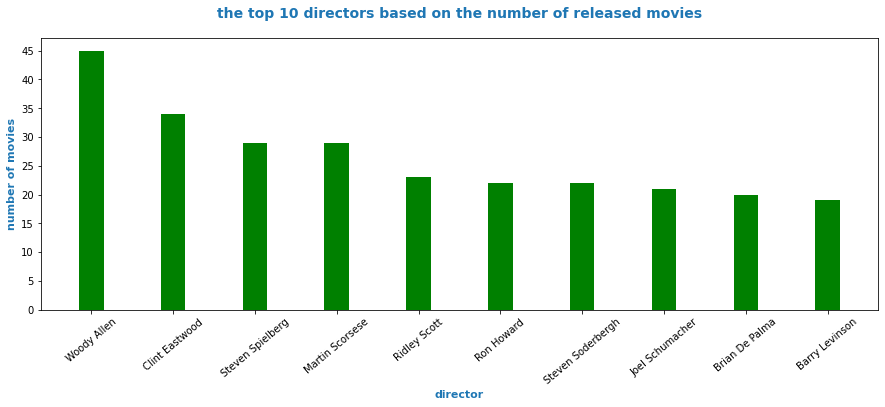

In [238]:
plot14 = plt.figure(14)
popular_directors_df= df.groupby('director')['id'].count()
popular_directors_df.sort_values(ascending=False, inplace=True)
popular_directors_df.drop('',inplace = True)
popular_directors_df = popular_directors_df.head(10)
plt.bar(list(popular_directors_df.index),popular_directors_df,width = 0.3,color = 'g')
plt.xlabel("director",fontsize=11,fontweight ='bold',c='#1f77b4')
plt.xticks(rotation = 40)
plt.yticks(np.arange(0,50,5))
plt.ylabel('number of movies',fontsize=11,fontweight ='bold',c='#1f77b4')
plt.title("the top 10 directors based on the number of released movies",fontsize = 14 , c='#1f77b4',pad=20,fontweight ='bold')

In [240]:
print('the top 10 directors based on the number of released movies\n\n',popular_directors_df)

the top 10 directors based on the number of released movies

 director
Woody Allen          45
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      29
Ridley Scott         23
Ron Howard           22
Steven Soderbergh    22
Joel Schumacher      21
Brian De Palma       20
Barry Levinson       19
Name: id, dtype: int64


### what is the number of movies in each genres 

Text(0.5, -0.2, ' movies in each genre ')

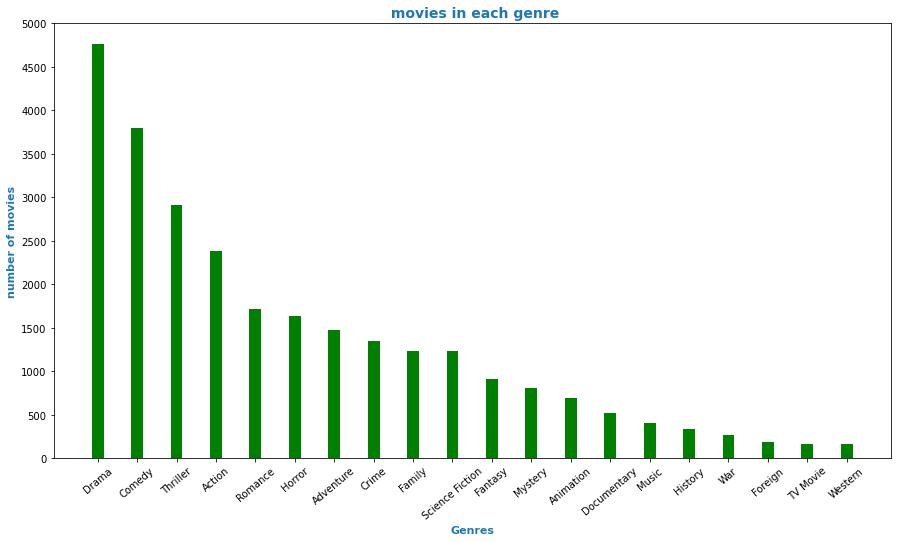

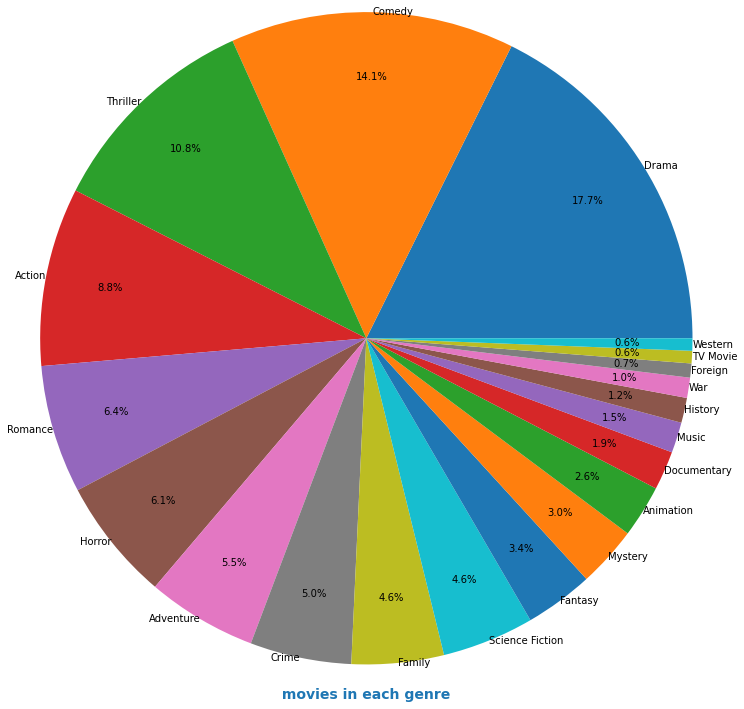

In [258]:
genres_count_series =df.assign(genres=df['genres'].str.split('|')).explode('genres').groupby('genres')['id'].count()
genres_count_series.drop('',inplace = True)
genres_count_series.sort_values(ascending = False,inplace = True)
plt.rcParams['figure.figsize'] = [15,8]
plot15 = plt.figure(15)
plt.bar(genres_count_series.index,genres_count_series.values,width = 0.3,color = 'g')
plt.xlabel("Genres",fontsize=11,fontweight ='bold',c='#1f77b4')
plt.xticks(rotation = 40)
plt.yticks(np.arange(0,5500,500))
plt.ylabel('number of movies',fontsize=11,fontweight ='bold',c='#1f77b4')
plt.title(" movies in each genre",fontsize = 14 , c='#1f77b4',fontweight ='bold')
plt.rcParams['figure.figsize'] = [10,10]
plot16 = plt.figure(16)
plt.pie(genres_count_series.values,labels = genres_count_series.index,autopct='%1.1f%%',radius=1.5,pctdistance=0.8, labeldistance=1)
plt.title(" movies in each genre ",fontsize = 14 ,c='#1f77b4',pad=20,fontweight ='bold', y=-0.2)

In [254]:
print ("number of movies in each genre\n\n",genres_count_series)

number of movies in each genre

 genres
Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: id, dtype: int64


From 1960 to 2015 the top 5 genres based on the number of released movies :  
Drama with 4760 movies  
Comedy with 3793 movies  
Thriller with 2907 movies  
Action with 2384 movies  
Romance with 1712 movies

### what is the effect of popularity on profit 

Text(0.5, 1.0, 'Profit vs Popularity ')

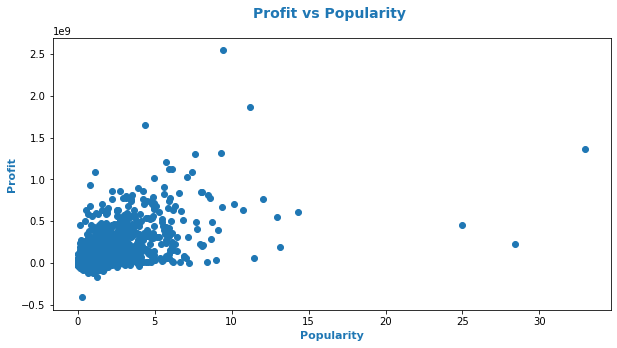

In [265]:
plt.rcParams['figure.figsize'] = [10,5]
plot17 = plt.figure(17)
plt.scatter(df["popularity"],(df["revenue"]-df["budget"]))
plt.xlabel("Popularity",fontsize=11,fontweight ='bold',c='#1f77b4')
plt.ylabel('Profit',fontsize=11,fontweight ='bold',c='#1f77b4')
plt.title("Profit vs Popularity ",fontsize = 14 ,c='#1f77b4',pad=20,fontweight ='bold') 

In [261]:
print ("The Correlation coefficient between profit and popularity: ",(df["revenue"]-df["budget"]).corr(df['popularity']))

The Correlation coefficient between profit and popularity:  0.6098993604420108


as **popularity** of movies increases , **the profit** of the movie increases

### what is the effect of runtime on average voting (rating)

Text(0.5, 1.0, 'Vote_average  vs runtime')

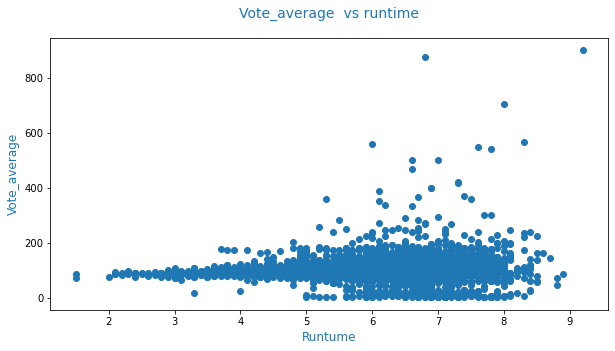

In [267]:
plot18 = plt.figure(18)
plt.scatter(df["vote_average"],df["runtime"])
plt.xlabel('Runtume',fontsize = 12, c='#1f77b4')
plt.ylabel('Vote_average',fontsize = 12 , c='#1f77b4')
plt.title('Vote_average  vs runtime',fontsize = 14 , c='#1f77b4',pad=20)

In [268]:
print ("The Correlation coefficient between vote_average and runtume: ",(df["vote_average"]).corr(df['runtime']))

The Correlation coefficient between vote_average and runtume:  0.15485469873143615


There is no obvious strong relation between **runtime** and **rating** of the movie 

### what is the effect of budegt on profit 

Text(0.5, 1.0, 'Profit  vs Budegt')

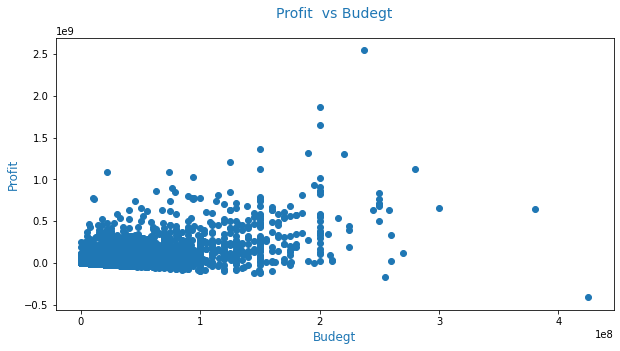

In [270]:
plot19 = plt.figure(19)
plt.scatter(df["budget"],(df["revenue"]-df["budget"]))
plt.xlabel('Budegt',fontsize = 12, c='#1f77b4')
plt.ylabel('Profit',fontsize = 12 , c='#1f77b4')
plt.title('Profit  vs Budegt',fontsize = 14 , c='#1f77b4',pad=20)

In [271]:
print ("The Correlation coefficient between Budegt and Profit: ",(df["revenue"]-df["budget"]).corr(df['budget']))

The Correlation coefficient between Budegt and Profit:  0.5340505629877231


as **budget** of movies increases , **the profit** of the movie increase

### what are the top 10 production companies based on number of released movies

Text(0.5, 1.0, 'Top 10 Production Campanies with highest number of released movies ')

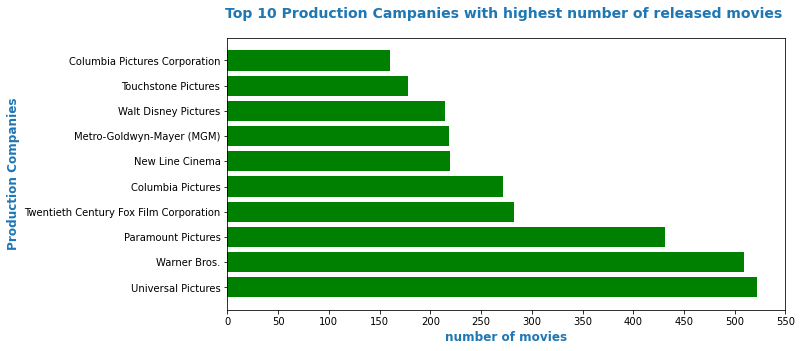

In [272]:
companies_ser =df.assign(production_companies=df['production_companies'].str.split('|')).explode('production_companies').groupby('production_companies')['id'].count()
companies_ser.drop('',inplace = True)
companies_ser= companies_ser.sort_values(ascending = False).head(10)
plot20 = plt.figure(20)
plt.barh(companies_ser.index,width=companies_ser.values,color= 'g')
plt.xlabel('number of movies',fontsize=12,fontweight ='bold',c='#1f77b4')
plt.xticks(np.arange(0,600,50))
plt.ylabel("Production Companies",fontsize=12,fontweight ='bold',c='#1f77b4')
plt.title("Top 10 Production Campanies with highest number of released movies ",fontsize = 14 , c='#1f77b4',pad=20,fontweight ='bold')

In [274]:
print ("top 10 production companies based on number of released movies\n\n",companies_ser)

top 10 production companies based on number of released movies

 production_companies
Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
New Line Cinema                           219
Metro-Goldwyn-Mayer (MGM)                 218
Walt Disney Pictures                      214
Touchstone Pictures                       178
Columbia Pictures Corporation             160
Name: id, dtype: int64


<a id='conclusions'></a>
## Conclusions

1. The Warrior's Way : The movie that has the highest budget based on a reference dollar (2010) with budget 425 million dollars.
2. Fear Clinic : The moive that has the lowest budget based on a reference dollar (2010) with budget 0.921091 dollars.
3. The budget of movies increaases over years 
4. 2010 is the year that has the highest budget for movies with 14.335 billion 2010 dollars 
5. The revenue of movies increaases over years 
6. 2015 is the year that has the highest revenue with 37.36 billion 2010 dollars 
7. The profit of movies increaases over years 
8. 1960 is the year that has the highest profit with 24.95 billion 2010 dollars 
9. Number of movies increases over years 
10. 2014 is the year of the highest number of movies with 700 movie 
11. Runtime of movies decreases over years 
12. 2013 is the year that has the lowest average of runtime of the movie with average runtime 96.7 minutes
13. Fresh Guacamole : is the shortest movie with 2 minutes
14. The Story of Film: An Odyssey : is the longest movie with 900 minutes
15. Having a homepage increase the propapbilty of being a popular movie but don’t guarantee to be popular 
16. popularity and profit are highly positivly correlated 
17. budget and profit are positivly correlated 
18. There is no effect of the runtime of movie and rating 
19. Being popular or having high profit don’t guarantee to be top rated 

### limitations 
The dataset has a high number of missing data in important columns, which may affect the accuracy of 
the analysis results . For example the budget and revenue columns have many zeros which affect any 
analysist that includes financial itmes like profit , top printable movies , movies with the highest budget 
and so on